In [1]:
!pip install torch
!pip install torchvision

In [10]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_validate,train_test_split,RandomizedSearchCV
import matplotlib.pyplot as plt

In [4]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.ensemble import ExtraTreesClassifier
>>> from sklearn.tree import DecisionTreeClassifier

In [5]:
transformer = transforms.Compose([
                               torchvision.transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x)),
                             ])

In [6]:
train_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=True, download=True,
                             transform=transformer)

test_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=False, download=True,
                             transform=transformer)

batch_size_train= len(train_set)//5
batch_size_test=len(test_set)

In [7]:
train_loader = torch.utils.data.DataLoader(
  train_set,
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  test_set,
  batch_size=batch_size_test, shuffle=True)

In [8]:
train_enumerated = enumerate(train_loader)
batch_idx, (train_x, train_y) = next(train_enumerated)

test_enumerated = enumerate(test_loader)
batch_idx, (test_x, test_y) = next(test_enumerated)

In [13]:
model_lbls = [
              'DecisionTree', 'RandomForest', 'ExtraTrees', 
            ]

models = {
    'DecisionTree': {'name': 'Decision Tree',
           'estimator': DecisionTreeClassifier(), 
           'param': [{}],
          },
    'RandomForest': {'name': 'Random Forest',
           'estimator': RandomForestClassifier(),
           'param': [{}]
          },
    'ExtraTrees': {'name': 'Extra Trees',
           'estimator': ExtraTreesClassifier(),
           'param': [{}],
          },
}

scores = ['precision', 'recall','f1']

In [18]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    true_y, pred_y = test_y, model.predict(test_x)
    print(classification_report(true_y, pred_y))
    print()

In [11]:

def evaluate_models(models):
    results_short = {}
    for score in scores:
        print('='*40)
        print("# Tuning hyper-parameters for %s" % score)
        print()

        for m in model_lbls:
            print('-'*40)
            print("Trying model {}".format(models[m]['name']))
            clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                               scoring='%s_macro' % score, 
                               return_train_score = False,
                               n_jobs = 2, 
                               )
            clf.fit(train_x, train_y)
            print_results(clf)
            results_short[m] = clf.best_score_
        print("Summary of results for {}".format(score))
        print("Estimator")
        for m in results_short.keys():
            print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

In [14]:
evaluate_models(models)

# Tuning hyper-parameters for precision

----------------------------------------
Trying model Decision Tree
Best parameters set found on train set:

{}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.94      0.92      0.93      1000
           2       0.60      0.63      0.62      1000
           3       0.79      0.77      0.78      1000
           4       0.64      0.63      0.63      1000
           5       0.87      0.86      0.86      1000
           6       0.50      0.50      0.50      1000
           7       0.85      0.86      0.86      1000
           8       0.87      0.86      0.87      1000
           9       0.88      0.89      0.89      1000

    accuracy                           0.76     10000
   macro avg     

Best parameters set found on train set:

{}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.72      0.78      0.75      1000
           3       0.85      0.89      0.87      1000
           4       0.74      0.79      0.76      1000
           5       0.96      0.93      0.95      1000
           6       0.69      0.55      0.61      1000
           7       0.91      0.94      0.92      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000


Summary of resul

In [20]:
model_lbls = [
             'RandomForest', 'ExtraTrees', 
            ]

models = {
    'RandomForest': {'name': 'Random Forest',
           'estimator': RandomForestClassifier(),
           'param': [{
               'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
           }]
          },
    'ExtraTrees': {'name': 'Extra Trees',
           'estimator': ExtraTreesClassifier(),
           'param': [{
               'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
           }],
          },
}

scores = ['f1']

In [16]:

def evaluate_models_random(models):
    results_short = {}
    for score in scores:
        print('='*40)
        print("# Tuning hyper-parameters for %s" % score)
        print()

        for m in model_lbls:
            print('-'*40)
            print("Trying model {}".format(models[m]['name']))
            clf = RandomizedSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                               scoring='%s_macro' % score, 
                                n_iter=50,
                               return_train_score = False,
                               n_jobs = -1, 
                               )
            clf.fit(train_x, train_y)
            print_results(clf)
            results_short[m] = clf.best_score_
        print("Summary of results for {}".format(score))
        print("Estimator")
        for m in results_short.keys():
            print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

In [21]:
evaluate_models_random(models)

# Tuning hyper-parameters for f1

----------------------------------------
Trying model Random Forest
Best parameters set found on train set:

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.99      0.93      0.96      1000
           2       0.68      0.77      0.72      1000
           3       0.82      0.89      0.85      1000
           4       0.70      0.79      0.74      1000
           5       0.98      0.93      0.95      1000
           6       0.71      0.47      0.56      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.96      0.95      1000
      

In [22]:
evaluate_models_random(models)

# Tuning hyper-parameters for f1

----------------------------------------
Trying model Random Forest
Best parameters set found on train set:

{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.99      0.93      0.96      1000
           2       0.67      0.76      0.71      1000
           3       0.81      0.89      0.85      1000
           4       0.69      0.79      0.74      1000
           5       0.97      0.93      0.95      1000
           6       0.70      0.46      0.55      1000
           7       0.89      0.91      0.90      1000
           8       0.94      0.96      0.95      1000
     

In [23]:
def plot_scores_by_parameter(model,ks,X_train,X_test,y_train,y_test,visualize=True):
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = model(k).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    if visualize:
        plt.figure(figsize=(10, 6))
        plt.plot(ks, train_scores, color='blue', label='train score')
        plt.plot(ks, test_scores, color='green', label='test score')
        plt.legend()
    return train_scores,test_scores

In [29]:
def bar_plot_scores_by_parameter(model,ks,X_train,X_test,y_train,y_test,visualize=True):
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = model(k).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    if visualize:
        plt.figure(figsize=(10, 6))
        plt.bar(ks, train_scores, color='blue', label='train score')
        plt.bar(ks, test_scores, color='green', label='test score')
        plt.legend()
    return train_scores,test_scores

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, random_state=0)

In [31]:
rndm_constructor = lambda a: RandomForestClassifier(bootstrap = a)

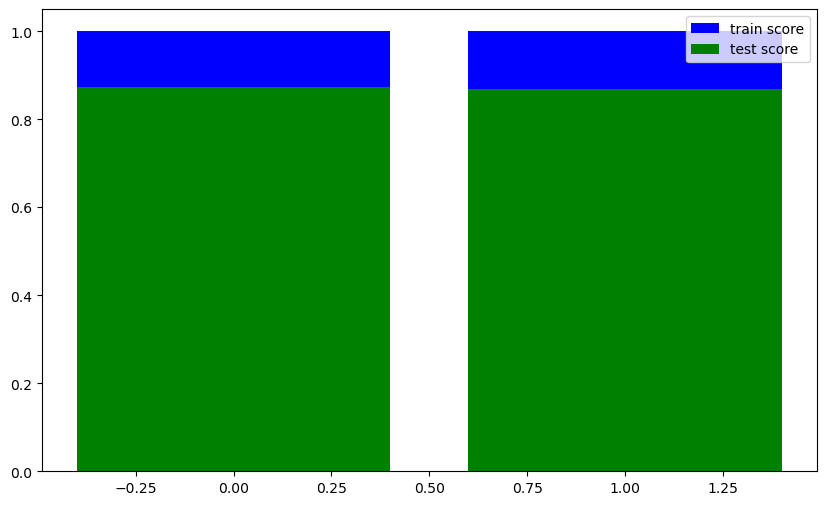

In [32]:
_=bar_plot_scores_by_parameter(rndm_constructor,[True,False],X_train,X_valid,y_train,y_valid)

In [27]:
rndm_constructor = lambda a: RandomForestClassifier(max_depth = a)

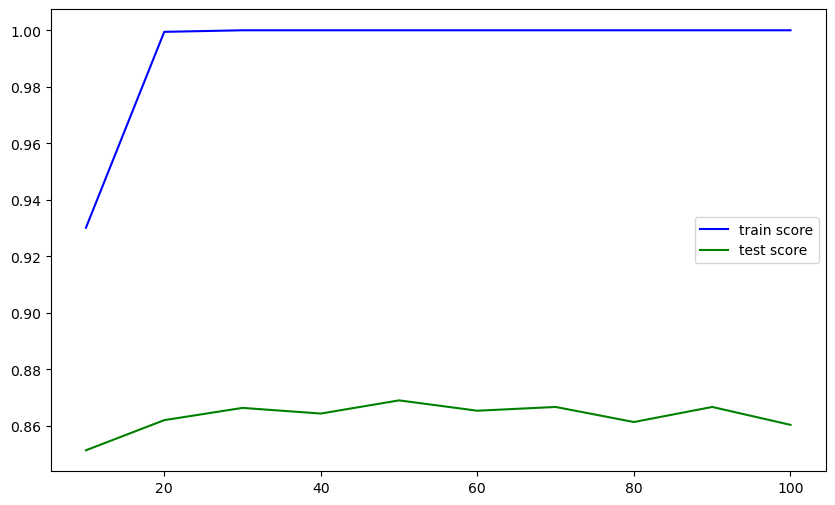

In [28]:
_=plot_scores_by_parameter(rndm_constructor,[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],X_train,X_valid,y_train,y_valid)

In [33]:
rndm_constructor = lambda a: RandomForestClassifier(max_features = a)

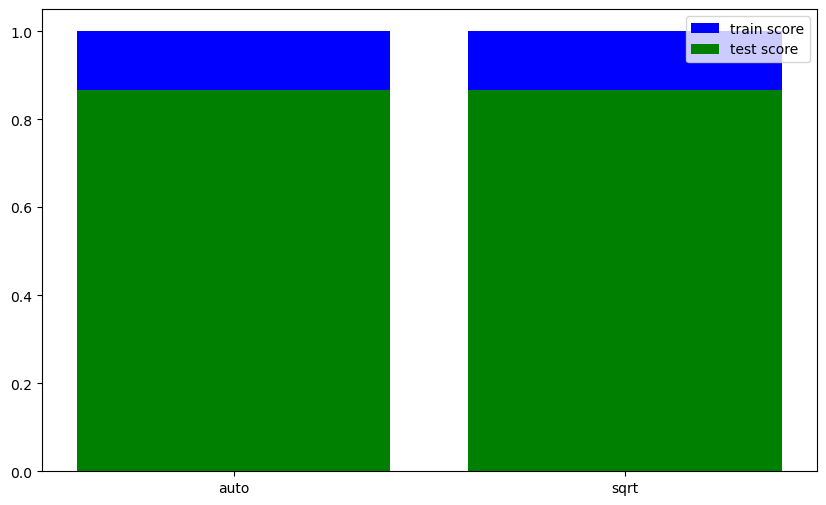

In [37]:
_=bar_plot_scores_by_parameter(rndm_constructor,['auto', 'sqrt'],X_train,X_valid,y_train,y_valid)

In [38]:
rndm_constructor = lambda a: RandomForestClassifier(min_samples_leaf = a)

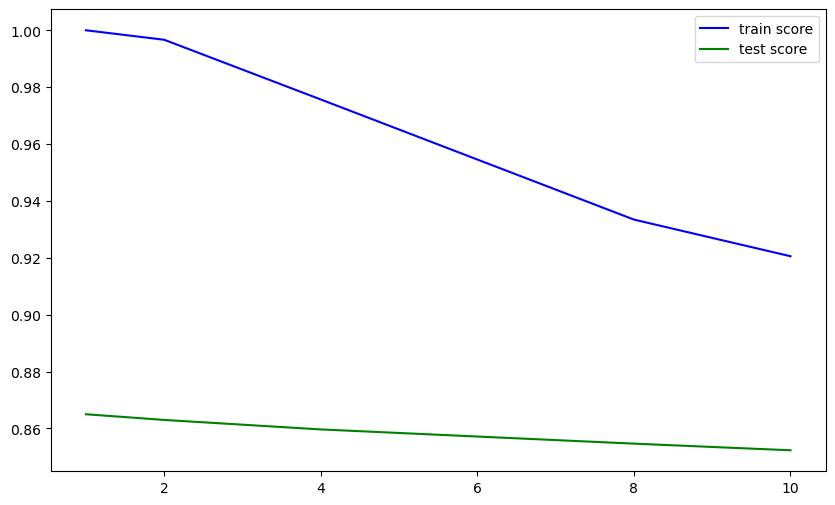

In [40]:
_=plot_scores_by_parameter(rndm_constructor,[1,2,4,8,10],X_train,X_valid,y_train,y_valid)

In [42]:
rndm_constructor = lambda a: RandomForestClassifier(min_samples_split = a)

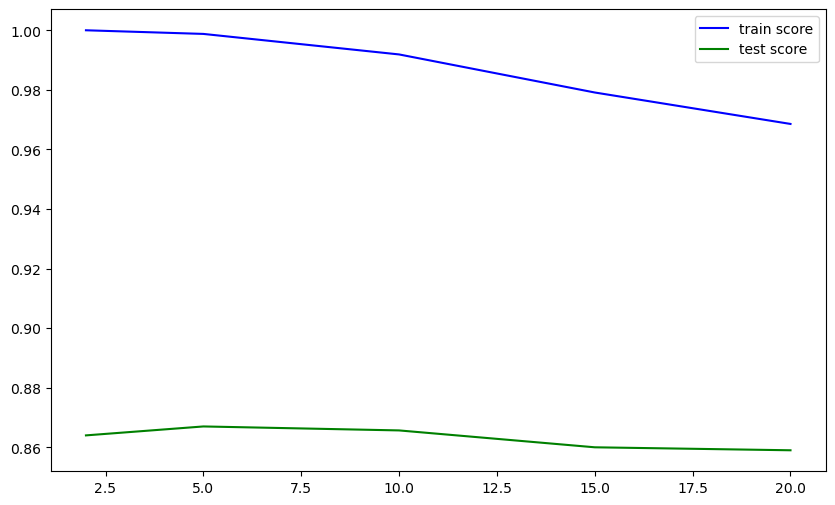

In [43]:
_=plot_scores_by_parameter(rndm_constructor,[2,5,10,15,20],X_train,X_valid,y_train,y_valid)

In [44]:
rndm_constructor = lambda a: RandomForestClassifier(n_estimators = a)

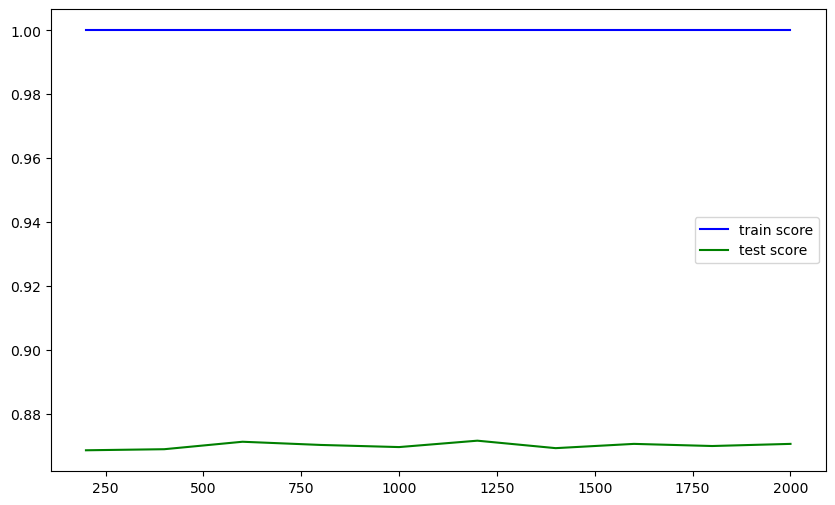

In [45]:
_=plot_scores_by_parameter(rndm_constructor,[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],X_train,X_valid,y_train,y_valid)